# pyAEMET

---

pyaemet es una librería para python desarrollada para la descarga de los valores climatologicos diarios de la AEMET a partir de su API OpenData. La librería contiene una serie de métodos que facilitan la descarga y filtrado de los datos climatológicos y cuyo uso se detalla a continuacion.

## Uso de la librería
---
Para poder usar la librería es necesario disponer de una APIkey de OpenData AEMET que se puede obtener en este [link](https://opendata.aemet.es/centrodedescargas/obtencionAPIKey). A partir de esta clave se puede crear un objeto de la clase principal `AemetClima` que permitirá utilizar los métodos de la librería.

In [1]:
from pyaemet import AemetClima

aemet = AemetClima(apikey="")

ImportError: cannot import name 'AemetClima' from 'pyaemet' (/home/jaimedgp/.local/lib/python3.7/site-packages/pyaemet/__init__.py)

### Información de las estaciones

La librería permite obtener información sobre las estaciones con datos climatológicos diarios disponibles por la AEMET. Además de la información de cada estación facilitada por la AEMET también se incluyen el Distrito, Ciudad, Provincia y Comunidad Autónoma de cada estación. 

Para algunos casos se ha detectado que la provincia facilitada no corresponde con la provincia obtenida a partir de las coordenadas debido a que la estación se encuentra proxima a los límites entre provincias. Por ello se ha denominado la provincia facilitada por la AEMET con el nombre de `provinciaAemet` y la determinada por las coordenadas como `provincia`.

In [2]:
estaciones = aemet.estaciones_info()
estaciones.head()

,latitud,provinciaAemet,altitud,indicativo,nombre,indsinop,longitud,distrito,ciudad,provincia,CA,pais
0,40.958056,TARRAGONA,32.0,0002I,VANDELLÒS,08169,0.871389,,Vandellòs l'Hospitalet de l'Infant,Tarragona,Cataluña,ESP
1,41.145000,TARRAGONA,71.0,0016A,REUS AEROPUERTO,08175,1.163611,,Reus,Tarragona,Catalunya,ESP
2,41.292778,BARCELONA,4.0,0076,BARCELONA AEROPUERTO,08181,2.070000,,El Prat de Llobregat,Barcelona,Catalunya,ESP
3,41.720000,BARCELONA,291.0,0149X,MANRESA,08174,1.840278,Manresa,Manresa,Barcelona,Catalunya,ESP
4,41.418333,BARCELONA,408.0,0200E,"BARCELONA, FABRA",,2.124167,Barcelona,Barcelona,Barcelona,Catalunya,ESP


Para facilitar el filtrado de las estaciones se ha incluido el método `AemetClima.estaciones_loc()` que permite filtrar las estaciones por los valores sus columnas. De esta manera se pueden filtrar las estaciones por ciudad, provincia o comunidad autónoma.

```python
    AemetClima(apikey).estaciones_loc(nombre_columna=["lista de valores"])
```

In [3]:
# estaciones disponibles en la provincia de Barcelona
pontevedra = aemet.estaciones_loc(provincia=["Pontevedra"])
pontevedra.head()

,latitud,provinciaAemet,altitud,indicativo,nombre,indsinop,longitud,distrito,ciudad,provincia,CA,pais
52,42.430556,PONTEVEDRA,19.0,1484,"PONTEVEDRA, INSTITUTO",,-8.647222,Pontevedra,Pontevedra,Pontevedra,Galicia,ESP
53,42.438333,PONTEVEDRA,108.0,1484C,PONTEVEDRA,08044,-8.615833,,Pontevedra,Pontevedra,Galicia,ESP
54,42.238611,PONTEVEDRA,261.0,1495,VIGO AEROPUERTO,08045,-8.623889,,Redondela,Pontevedra,Galicia,ESP


In [4]:
# Estaciones disponibles en la comunidad de Madrid
madrid = aemet.estaciones_loc(CA=["Comunidad de Madrid"])
madrid.head()

,latitud,provinciaAemet,altitud,indicativo,nombre,indsinop,longitud,distrito,ciudad,provincia,CA,pais
96,40.067222,MADRID,540.0,3100B,ARANJUEZ,08229,-3.546111,,Aranjuez,Madrid,Comunidad de Madrid,ESP
97,41.006944,MADRID,1030.0,3110C,BUITRAGO DEL LOZOYA,08146,-3.613611,,Buitrago del Lozoya,Madrid,Comunidad de Madrid,ESP
98,41.135556,MADRID,1450.0,3111D,SOMOSIERRA,08145,-3.580278,Somosierra,Somosierra,Madrid,Comunidad de Madrid,ESP
99,40.466667,MADRID,609.0,3129,MADRID AEROPUERTO,08221,-3.555556,,Madrid,Madrid,Comunidad de Madrid,ESP
104,40.488611,MADRID,607.0,3175,TORREJÓN DE ARDOZ,08227,-3.443611,,Torrejón de Ardoz,Madrid,Comunidad de Madrid,ESP


Por otro lado, el método `AemetClima.estaciones_cerca(latitud, longitud, n_cercanas)` te permite obtener las `n_cercanas` estaciones de la AEMET más cercanas a una cierta localización definida por sus coordenadas latitud y longitud, junto con su distancia a la localización en km. Por defecto se devuelven las 3 estaciones más cercanas.

In [5]:
cerca = aemet.estaciones_cerca(latitud=43.47, longitud=-3.798, n_cercanas=5)
cerca.head()

,latitud,provinciaAemet,altitud,indicativo,nombre,indsinop,longitud,distrito,ciudad,provincia,CA,pais,distancia
27,43.465000,CANTABRIA,64.0,1110,"SANTANDER, CIUDAD",,-3.818889,Santander,Santander,Cantabria,Cantabria,ESP,1.775077
29,43.491111,CANTABRIA,52.0,1111X,SANTANDER,08023,-3.800556,,Santander,Cantabria,Cantabria,ESP,2.356487
28,43.491111,CANTABRIA,52.0,1111,SANTANDER,08023,-3.800556,,Santander,Cantabria,Cantabria,ESP,2.356487
26,43.423889,CANTABRIA,3.0,1109,SANTANDER AEROPUERTO,08021,-3.825556,Maliaño,Camargo,Cantabria,Cantabria,ESP,5.589092
25,43.394722,CANTABRIA,45.0,1083L,CASTRO URDIALES,08020,-3.233889,,Castro-Urdiales,Cantabria,Cantabria,ESP,46.313591


Por otro lado, se ha añadido el método `AemetClima.estaciones_curacion` para facilitar el curado de los datos. Este método permite obtener las estaciones que cumplan el requisito de que tengan al menos un porcentaje determinado `umbral` de los datos de ciertas variables `variables` disponibles. El método puede comportarse de dos maneras distintas en función de los argumentos que se le pasen.

El método `AemetClima.estaciones_curacion` permite pasarle la información de las estaciones de las cuales se quiere obtener información sobre la cantidad de datos disponibles. De esta forma, si se le pase el argumento `estaciones` mediante su `indicativo` en forma de `string` o lista de `strings` o pasando directamente un pandas.DataFrame devuelto por los métodos vistos anteriormente con la información de las estaciones el método añadirá la columna `suficientesDatos` booleana según si la estación cumple o no la condición.

```python
AemetClima(apikey).estaciones_curacion(estacion, 
                                       fecha_ini=datetime.date(), 
                                       fecha_fin=datetime.date.now(),
                                       umbral=0.75,  # por defecto se toma el 75%  
                                       variables=columnas, 
                                       save_folder="directorio/guardar/los/datos/")
```

In [6]:
from datetime import date

aemet.estaciones_curacion(estacion=pontevedra, 
                          fecha_ini=date(2015, 1, 1), 
                          fecha_fin=date(2021, 5, 1),
                          umbral=0.8, 
                          variables=["tmed", "prec", "velmedia"], 
                          save_folder=None)

,latitud,provinciaAemet,altitud,indicativo,nombre,indsinop,longitud,distrito,ciudad,provincia,CA,pais,suficientesDatos
52,42.430556,PONTEVEDRA,19.0,1484,"PONTEVEDRA, INSTITUTO",,-8.647222,Pontevedra,Pontevedra,Pontevedra,Galicia,ESP,False
53,42.438333,PONTEVEDRA,108.0,1484C,PONTEVEDRA,08044,-8.615833,,Pontevedra,Pontevedra,Galicia,ESP,True
54,42.238611,PONTEVEDRA,261.0,1495,VIGO AEROPUERTO,08045,-8.623889,,Redondela,Pontevedra,Galicia,ESP,True


Por otro lado, se puede utilizar esta funcion para obtener la estación más cercana a una localización que cumpla el requisito de los datos mínimos. Esta función obtiene la información de las estaciones llamando a la función `AemetClima.estaciones_cerca(latitud, longitud, n_cercanas)`.

```python
AemetClima(apikey).estaciones_curacion(latitud, longitud, n_cercanas, 
                                       fecha_ini=datetime.date(), 
                                       fecha_fin=datetime.date.now(),
                                       umbral=0.75,  # por defecto se toma el 75%  
                                       variables=columnas, 
                                       save_folder="directorio/guardar/los/datos/")
```

In [7]:
aemet.estaciones_curacion(latitud=43.47, longitud=-3.798, n_cercanas=5,  
                          fecha_ini=date(2015, 1, 1), 
                          fecha_fin=date(2021, 5, 1),
                          umbral=0.8, 
                          variables=["tmed", "prec", "velmedia"], 
                          save_folder=None)

,latitud,provinciaAemet,altitud,indicativo,nombre,indsinop,longitud,distrito,ciudad,provincia,CA,pais,distancia
29,43.491111,CANTABRIA,52.0,1111X,SANTANDER,08023,-3.800556,,Santander,Cantabria,Cantabria,ESP,2.356487


### Descarga Valores Climatológicos

Para la descarga de los datos climatológicos se han de pasar las fechas de inicio y final de los datos, que han de ser objetos de la clase `datetime.date` o `datetime.datetime` y las estaciones de las cuales se quieren obtener los datos. Estas últimas se pueden pasar mediante su `indicativo` en forma de `string` o lista de `strings` o pasando directamente un pandas.DataFrame devuelto por los métodos vistos anteriormente con la información de las estaciones. El valor de la fecha de fin por defecto será la del día en el que se encuentre `datetime.date.today()`.

```python
AemetClima(apikey).clima_diaria(estacion, 
                                fecha_ini=datetime.date(), 
                                fecha_fin=datetime.date.today()
                                )
```

In [8]:
data_aranjuez = aemet.clima_diaria(estacion="3100B", 
                                   fecha_ini=date(2015, 1, 1), 
                                   fecha_fin=date(2021, 5, 1)
                                   )
data_aranjuez.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha
0,2015-01-01,3100B,ARANJUEZ,MADRID,540,3.0,0.0,-6.6,7.0,12.7,15.0,NaN,NaN,NaN,NaN
1,2015-01-02,3100B,ARANJUEZ,MADRID,540,3.4,0.0,-6.0,7.0,12.8,15.0,NaN,NaN,NaN,NaN
2,2015-01-03,3100B,ARANJUEZ,MADRID,540,4.8,0.0,-4.7,7.0,14.2,15.0,NaN,NaN,NaN,NaN
3,2015-01-04,3100B,ARANJUEZ,MADRID,540,5.8,0.0,-4.2,8.0,15.7,16.0,NaN,NaN,NaN,NaN
4,2015-01-05,3100B,ARANJUEZ,MADRID,540,6.6,0.0,-2.9,5.0,16.0,15.0,NaN,NaN,NaN,NaN


In [9]:
# Datos de la provincia de Tarragona 
# Se pasa el pandas.DataFrame obtenido anteriormente
data_pontevedra = aemet.clima_diaria(estacion=pontevedra, 
                                    fecha_ini=date(2015, 1, 1), 
                                    fecha_fin=date(2021, 5, 1)
                                    )

indicativo
1484C    AxesSubplot(0.125,0.2;0.775x0.68)
1495     AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

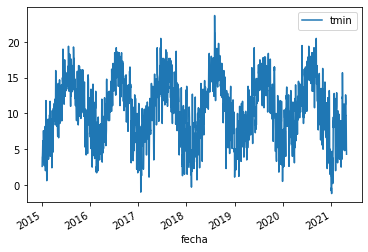

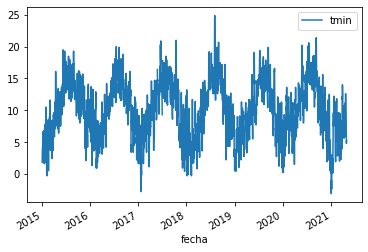

In [10]:
data_pontevedra.groupby("indicativo").plot(x="fecha", y="tmin")

## Referencias
---
La información que recoge y utiliza esta librería es propiedad de la Agencia Estatal de Meteorología disponible mediante su API REST [AEMET OpenData](https://opendata.aemet.es/centrodedescargas/AEMETApi?).
